# Importing Libs and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BADM576/HR_prediction (4).csv')

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_>80%,awards_won?,avg_training_score,promoted
0,A_1,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,A_2,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,A_3,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,A_4,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,A_5,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


# EDA

The dataset has 78284 rows and 14 columns
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met_>80%           0
awards_won?             0
avg_training_score      0
promoted                0
dtype: int64
The dataset has 0 duplicates


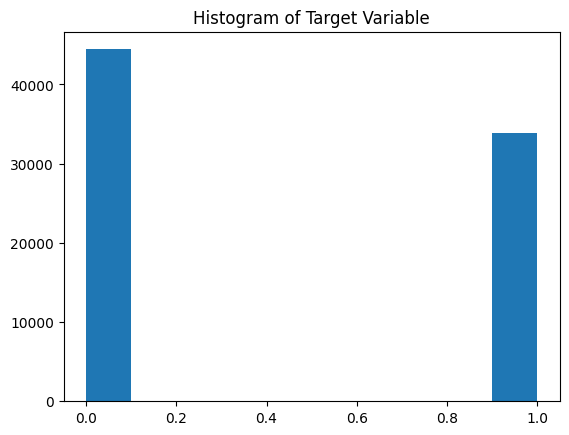

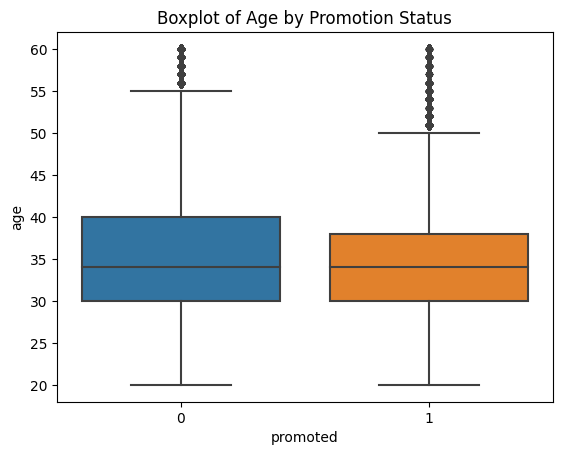

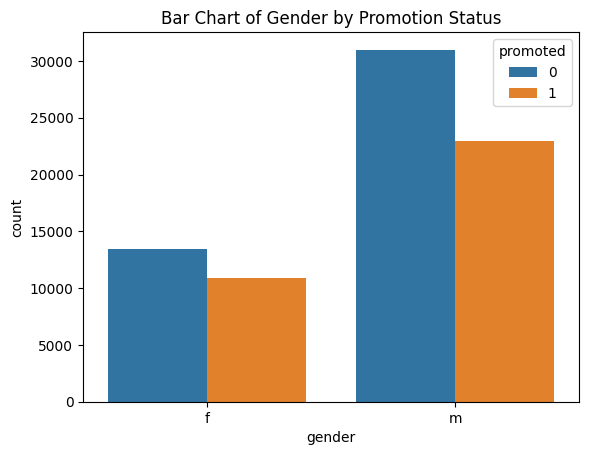

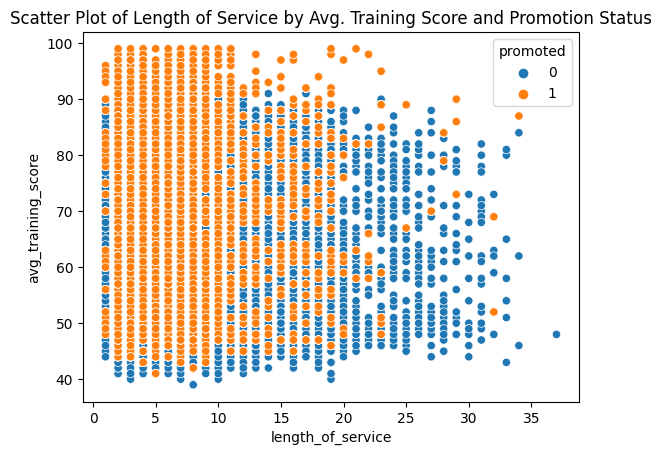

In [5]:
# Checking the shape of the dataset
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns")

# Checking for missing values
print(df.isnull().sum())

# Checking for duplicates
print("The dataset has", df.duplicated().sum(), "duplicates")

# Plotting a histogram of the target variable
plt.hist(df['promoted'])
plt.title("Histogram of Target Variable")
plt.show()

# Plotting a boxplot of the age variable
sns.boxplot(x='promoted', y='age', data=df)
plt.title("Boxplot of Age by Promotion Status")
plt.show()

# Plotting a bar chart of the gender variable
sns.countplot(x='gender', hue='promoted', data=df)
plt.title("Bar Chart of Gender by Promotion Status")
plt.show()

# Plotting a scatter plot of the length of service variable against average training score
sns.scatterplot(x='length_of_service', y='avg_training_score', hue='promoted', data=df)
plt.title("Scatter Plot of Length of Service by Avg. Training Score and Promotion Status")
plt.show()


Interpretation of the charts:

1. The histogram shows that the target variable 'promoted' is imbalanced, with a majority of employees not being promoted.
2. The boxplot shows that there is no significant difference in the age distribution between employees who were promoted and those who were not.
3. The bar chart shows that the number of male employees who were promoted is higher than the number of female employees who were promoted.
4. The scatter plot shows that there is no clear relationship between the length of service and average training score variables, and the promotion status of employees.

In [6]:
# Dropping the ID column

df.drop(columns = ['employee_id'], inplace = True)

# Encoding, Splitting, and Scaling

In [7]:
# Checking the data types of columns
print(df.dtypes)

# Encoding the categorical variables
df = pd.get_dummies(df, columns=['department', 'region', 'education', 'recruitment_channel', 'gender'], drop_first=True)

# Checking for skewness in the numerical variables
print(df.skew())

# Splitting the data into training and test sets
X = df.drop('promoted', axis=1)
y = df['promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the numerical variables
num_cols = ['age', 'length_of_service', 'no_of_trainings', 'previous_year_rating', 'avg_training_score']
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols)])

department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings          int64
age                      int64
previous_year_rating     int64
length_of_service        int64
KPIs_met_>80%            int64
awards_won?              int64
avg_training_score       int64
promoted                 int64
dtype: object
no_of_trainings                  3.336350
age                              1.052113
previous_year_rating            -0.466634
length_of_service                1.793883
KPIs_met_>80%                    0.057508
awards_won?                      3.726196
avg_training_score               0.288325
promoted                         0.272596
department_Finance               4.411250
department_HR                    4.819885
department_Legal                 8.027802
department_Operations            1.336016
department_Procurement           2.039110
department_R&D                   7.56

# Logistic Regression

In [8]:
# Error-based Model - Logistic Regression
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])
lr_params = {'classifier__C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr_model, param_grid=lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'length_of_service',
                                                                          'no_of_trainings',
                                                                          'previous_year_rating',
                                                                          'avg_training_score'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10]}, scoring='accuracy')

# Decision Tree 

In [9]:
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', DecisionTreeClassifier(random_state=42))])
dt_params = {'classifier__max_depth': [5, 10, 15]}
dt_grid = GridSearchCV(dt_model, param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'length_of_service',
                                                                          'no_of_trainings',
                                                                          'previous_year_rating',
                                                                          'avg_training_score'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [5, 10, 15]},
             scoring='accuracy')

# KNN

In [10]:
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', KNeighborsClassifier())])
knn_params = {'classifier__n_neighbors': [5, 10, 15]}
knn_grid = GridSearchCV(knn_model, param_grid=knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'length_of_service',
                                                                          'no_of_trainings',
                                                                          'previous_year_rating',
                                                                          'avg_training_score'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [5, 10, 15]},
             scoring='accuracy')

# Comparing Model Performance

In [11]:
# Logistic Regression
lr_y_pred = lr_grid.predict(X_test)
print('Logistic Regression Classification Report:')
print(classification_report(y_test, lr_y_pred))

# Decision Tree
dt_y_pred = dt_grid.predict(X_test)
print('Decision Tree Classification Report:')
print(classification_report(y_test, dt_y_pred))

# KNN
knn_y_pred = knn_grid.predict(X_test)
print('KNN Classification Report:')
print(classification_report(y_test, knn_y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      8882
           1       0.64      0.56      0.60      6775

    accuracy                           0.67     15657
   macro avg       0.67      0.66      0.66     15657
weighted avg       0.67      0.67      0.67     15657

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      8882
           1       0.74      0.64      0.69      6775

    accuracy                           0.75     15657
   macro avg       0.74      0.73      0.74     15657
weighted avg       0.75      0.75      0.74     15657

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      8882
           1       0.75      0.97      0.85      6775

    accuracy                           0.85     15657
   macro avg       0.

From the dataset we can see that the KNN is the best model amongst the three with an accuracy of 0.85. The model is followed by Decision Tree and Losgistic Regression. 